Prepare

First I downloaded the raw data from the webpage to "list.json". This is the original file used in the webpage to display the results in HTML format.
The premise is that whatever works works. I don't put emphasis on reusability or usage of pandas, instead I ran the below cell twice and edited the output file, changing the team attribute to capture only teams and accounting for different user inputs of the same team name, but also adding a sex attribute.
To extract and structure all relevant information we run scripts like the following.


In [1]:
import csv
import json

with open("list.json", "r") as file:
    raw_data = json.load(file)

    data = [
        {
            "bib": d[0],
            "team": d[5],
            "place": d[1].replace(".", ""),
            "name": d[3],
            "nationality": d[4],
            "swim_time": d[6].split(" ")[0],
            "swim_place": d[6].split(" ")[-1].replace(".", ""),
            "t1_time": d[7],
            "bike_time": d[8].split(" ")[0],
            "bike_place": d[8].split(" ")[-1].replace(".", ""),
            "t2_time": d[9],
            "run_time": d[10].split(" ")[0],
            "run_place": d[10].split(" ")[-1].replace(".", ""),
            "total_time": d[11],
        }
        for d in raw_data["data"]["#2_Frauen"]
    ]

    # CSV file path
    csv_file = "data.csv"

    # Open the file in append mode
    with open(csv_file, "a", newline="") as file:
        # Get the fieldnames from the first dictionary
        fieldnames = data[0].keys()

        # Create a DictWriter object
        writer = csv.DictWriter(file, fieldnames=fieldnames)

        # Write the data (without writing the header again)
        # writer.writerows(data)

    print("Data appended successfully!")

Data appended successfully!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Now we read the csv file into a Pandas DataFrame


In [3]:
df = pd.read_csv("data.csv")
df

,sex,bib,team,place,name,nationality,swim_time,swim_place,t1_time,bike_time,bike_place,t2_time,run_time,run_place,total_time
0,M,1197,Post SV Nürnberg,1,RUPPRECHT Alexander,GER,00:24:17,10,00:01:55,00:58:09,1,00:01:11,00:34:59,3.0,02:00:28
1,M,1188,Twin Neumarkt,2,WIEDEMANN Matteo,GER,00:23:51,8,00:01:55,00:59:43,2,00:01:41,00:33:50,1.0,02:00:57
2,M,1214,NaN,3,HARTMANN Johannes,GER,00:20:53,2,00:02:30,01:02:05,4,00:01:53,00:35:39,5.0,02:02:58
3,M,1120,Donau Run Ingolstadt,4,OSTERMEIR Lukas,GER,00:23:02,4,00:01:53,01:03:49,8,00:02:28,00:34:31,2.0,02:05:42
4,M,1097,Halberhai e.V Nürnberg.,5,DOWALIL Christoph,GER,00:23:07,5,00:02:06,01:03:14,5,00:01:50,00:36:06,7.0,02:06:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,F,1090,NaN,35,DISTLER Stephanie,USA,00:44:13,35,00:05:40,01:43:56,36,00:05:09,00:55:51,26.0,03:34:46
184,F,1071,NaN,36,KLINGSHIRN Carolin,GER,00:53:55,36,00:09:34,01:29:32,33,00:06:32,01:11:27,36.0,03:50:58
185,F,1064,Mind2Motion,DNF,SCHWARZ Carolin,GER,00:34:06,0:34:06,00:03:04,NaN,NaN,NaN,NaN,NaN,NaN
186,F,1040,Rocket Racing,DNF,GÖBEL Alina,GER,00:37:13,0:37:13,00:03:09,NaN,NaN,NaN,NaN,NaN,NaN


After skimming through the csv file, what we see is that athletes that didn't finish the race (DNF), where disqualified (DSQ) or didn't start (DNS) do not have full datasets, since they didn't finish the race. Hence pandas types most columns as objects:


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          188 non-null    object 
 1   bib          188 non-null    int64  
 2   team         76 non-null     object 
 3   place        188 non-null    object 
 4   name         188 non-null    object 
 5   nationality  188 non-null    object 
 6   swim_time    184 non-null    object 
 7   swim_place   178 non-null    object 
 8   t1_time      184 non-null    object 
 9   bike_time    176 non-null    object 
 10  bike_place   176 non-null    object 
 11  t2_time      176 non-null    object 
 12  run_time     175 non-null    object 
 13  run_place    175 non-null    float64
 14  total_time   176 non-null    object 
dtypes: float64(1), int64(1), object(13)
memory usage: 22.2+ KB


In [5]:
fin = df[~df["place"].isin(["DSQ", "DNF", "DNS"])]
fin

,sex,bib,team,place,name,nationality,swim_time,swim_place,t1_time,bike_time,bike_place,t2_time,run_time,run_place,total_time
0,M,1197,Post SV Nürnberg,1,RUPPRECHT Alexander,GER,00:24:17,10,00:01:55,00:58:09,1,00:01:11,00:34:59,3.0,02:00:28
1,M,1188,Twin Neumarkt,2,WIEDEMANN Matteo,GER,00:23:51,8,00:01:55,00:59:43,2,00:01:41,00:33:50,1.0,02:00:57
2,M,1214,NaN,3,HARTMANN Johannes,GER,00:20:53,2,00:02:30,01:02:05,4,00:01:53,00:35:39,5.0,02:02:58
3,M,1120,Donau Run Ingolstadt,4,OSTERMEIR Lukas,GER,00:23:02,4,00:01:53,01:03:49,8,00:02:28,00:34:31,2.0,02:05:42
4,M,1097,Halberhai e.V Nürnberg.,5,DOWALIL Christoph,GER,00:23:07,5,00:02:06,01:03:14,5,00:01:50,00:36:06,7.0,02:06:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,F,1150,NaN,32,BOUSQUET Noah,GER,00:35:33,23,00:07:25,01:21:16,24,00:04:39,00:56:15,27.0,03:05:06
181,F,1127,Laufmeile Bamberg,33,BISCHOFF Bianca,GER,00:41:56,33,00:04:12,01:26:17,31,00:02:42,00:56:41,30.0,03:11:46
182,F,1122,NaN,34,SCHWARZE Manuela,GER,00:32:57,17,00:03:37,01:32:49,35,00:04:13,01:01:51,35.0,03:15:25
183,F,1090,NaN,35,DISTLER Stephanie,USA,00:44:13,35,00:05:40,01:43:56,36,00:05:09,00:55:51,26.0,03:34:46


In [6]:
fin["total_time"] = pd.to_timedelta(fin["total_time"])
fin["t1_time"] = pd.to_timedelta(fin["t1_time"])
fin["t2_time"] = pd.to_timedelta(fin["t2_time"])
fin["change_time"] = fin["t1_time"] + fin["t2_time"]
fin["swim_time"] = pd.to_timedelta(fin["swim_time"])
fin["bike_time"] = pd.to_timedelta(fin["bike_time"])
fin["run_time"] = pd.to_timedelta(fin["run_time"])


fin["sex"] = fin["sex"].astype("category")
fin["bib"] = fin["bib"].astype("int")
fin["place"] = fin["place"].astype("int")
fin["swim_place"] = fin["swim_place"].astype("int")
fin["bike_place"] = fin["bike_place"].astype("int")
fin["run_place"] = fin["run_place"].astype("int")

fin["nationality"] = fin["nationality"].astype("category")
fin["name"] = fin["name"].astype("string")
fin["team"] = fin["team"].astype("category")

fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, 0 to 184
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   sex          175 non-null    category       
 1   bib          175 non-null    int64          
 2   team         70 non-null     category       
 3   place        175 non-null    int64          
 4   name         175 non-null    string         
 5   nationality  175 non-null    category       
 6   swim_time    175 non-null    timedelta64[ns]
 7   swim_place   175 non-null    int64          
 8   t1_time      175 non-null    timedelta64[ns]
 9   bike_time    175 non-null    timedelta64[ns]
 10  bike_place   175 non-null    int64          
 11  t2_time      175 non-null    timedelta64[ns]
 12  run_time     175 non-null    timedelta64[ns]
 13  run_place    175 non-null    int64          
 14  total_time   175 non-null    timedelta64[ns]
 15  change_time  175 non-null    timedelta64[ns]


/tmp/ipykernel_27060/1964934239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin["total_time"] = pd.to_timedelta(fin["total_time"])
/tmp/ipykernel_27060/1964934239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin["t1_time"] = pd.to_timedelta(fin["t1_time"])
/tmp/ipykernel_27060/1964934239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [13]:
fin["total_time_in_seconds"] = fin["total_time"].dt.total_seconds()
fin["t1_time_in_seconds"] = fin["t1_time"].dt.total_seconds()
fin["t2_time_in_seconds"] = fin["t2_time"].dt.total_seconds()
fin["change_time_in_seconds"] = fin["change_time"].dt.total_seconds()
fin["swim_time_in_seconds"] = fin["swim_time"].dt.total_seconds()
fin["bike_time_in_seconds"] = fin["bike_time"].dt.total_seconds()
fin["run_time_in_seconds"] = fin["run_time"].dt.total_seconds()

fin["diff_time_in_seconds"] = 0.0
fin.loc[fin["sex"] == "M",  "diff_time_in_seconds"] = (
    fin["total_time_in_seconds"] - 7228.0
)
fin

/tmp/ipykernel_27060/3865083310.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_27060/3865083310.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_27060/3865083310.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2

,sex,bib,team,place,name,nationality,swim_time,swim_place,t1_time,bike_time,...,total_time,change_time,total_time_in_seconds,t1_time_in_seconds,t2_time_in_seconds,change_time_in_seconds,swim_time_in_seconds,bike_time_in_seconds,run_time_in_seconds,diff_time_in_seconds
0,M,1197,Post SV Nürnberg,1,RUPPRECHT Alexander,GER,0 days 00:24:17,10,0 days 00:01:55,0 days 00:58:09,...,0 days 02:00:28,0 days 00:03:06,7228.0,115.0,71.0,186.0,1457.0,3489.0,2099.0,0.0
1,M,1188,Twin Neumarkt,2,WIEDEMANN Matteo,GER,0 days 00:23:51,8,0 days 00:01:55,0 days 00:59:43,...,0 days 02:00:57,0 days 00:03:36,7257.0,115.0,101.0,216.0,1431.0,3583.0,2030.0,29.0
2,M,1214,NaN,3,HARTMANN Johannes,GER,0 days 00:20:53,2,0 days 00:02:30,0 days 01:02:05,...,0 days 02:02:58,0 days 00:04:23,7378.0,150.0,113.0,263.0,1253.0,3725.0,2139.0,150.0
3,M,1120,Donau Run Ingolstadt,4,OSTERMEIR Lukas,GER,0 days 00:23:02,4,0 days 00:01:53,0 days 01:03:49,...,0 days 02:05:42,0 days 00:04:21,7542.0,113.0,148.0,261.0,1382.0,3829.0,2071.0,314.0
4,M,1097,Halberhai e.V Nürnberg.,5,DOWALIL Christoph,GER,0 days 00:23:07,5,0 days 00:02:06,0 days 01:03:14,...,0 days 02:06:21,0 days 00:03:56,7581.0,126.0,110.0,236.0,1387.0,3794.0,2166.0,353.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,F,1150,NaN,32,BOUSQUET Noah,GER,0 days 00:35:33,23,0 days 00:07:25,0 days 01:21:16,...,0 days 03:05:06,0 days 00:12:04,11106.0,445.0,279.0,724.0,2133.0,4876.0,3375.0,0.0
181,F,1127,Laufmeile Bamberg,33,BISCHOFF Bianca,GER,0 days 00:41:56,33,0 days 00:04:12,0 days 01:26:17,...,0 days 03:11:46,0 days 00:06:54,11506.0,252.0,162.0,414.0,2516.0,5177.0,3401.0,0.0
182,F,1122,NaN,34,SCHWARZE Manuela,GER,0 days 00:32:57,17,0 days 00:03:37,0 days 01:32:49,...,0 days 03:15:25,0 days 00:07:50,11725.0,217.0,253.0,470.0,1977.0,5569.0,3711.0,0.0
183,F,1090,NaN,35,DISTLER Stephanie,USA,0 days 00:44:13,35,0 days 00:05:40,0 days 01:43:56,...,0 days 03:34:46,0 days 00:10:49,12886.0,340.0,309.0,649.0,2653.0,6236.0,3351.0,0.0


In [14]:
import plotly.express as px

fig = px.bar(
    fin[fin["sex"] == "M"],
    x="place",
    y="diff_time_in_seconds",
    hover_name="name",
)
fig.show()

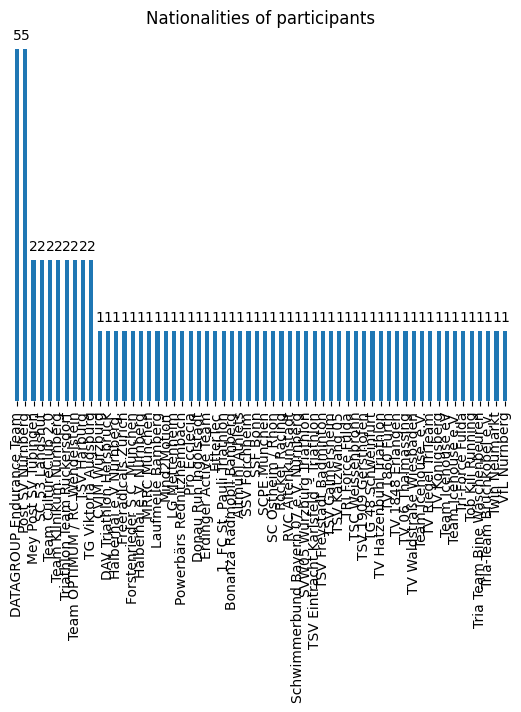

In [ ]:
ax = df.groupby("team").size().sort_values(ascending=False).plot(kind="bar")


for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        textcoords="offset points",
        xytext=(0, 10),
        arrowprops=None,
    )


# Remove the axis labels
ax.set_ylabel("")
ax.set_xlabel("")

# Remove the y-axis ticks and numbers
ax.yaxis.set_visible(False)

# Remove the spines (the black box)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.set_title("Nationalities of participants")

plt.show()

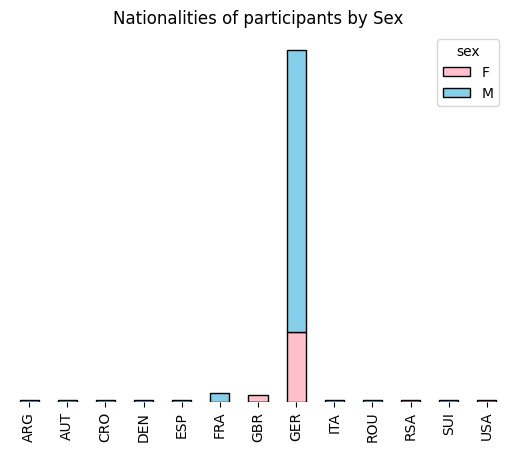

In [ ]:
# Group by nationality and sex, then count the occurrences
grouped_df = (
    df.groupby(["nationality", "sex"])
    .size()
    .sort_values(ascending=False)
    .unstack(fill_value=0)
)

# Plot the stacked bar plot
ax = grouped_df.plot(
    kind="bar", stacked=True, color=["pink", "skyblue"], edgecolor="black"
)

# Add annotations for the stacked bars
# for container in ax.containers:
# ax.bar_label(container, label_type="center")

# Customize the plot
ax.set_ylabel("")
ax.set_xlabel("")
ax.yaxis.set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_title("Nationalities of participants by Sex")

plt.show()